(c) 2022 Manuel Razo. This work is licensed under a [Creative Commons
Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
All code contained herein is licensed under an [MIT
license](https://opensource.org/licenses/MIT).

In [1]:
# Finding project home directory directory

# Save current directory
dir = read(`pwd`, String)
dir = dir[1:end-1]

# Load package for project by locating git home folder
home_dir = read(`git rev-parse --show-toplevel`, String)
home_dir = home_dir[1:end-1]

# Change directories
cd(home_dir * "/jlStatGen")
# Activate environment
using Pkg
Pkg.pkg"activate ."

# Return to original directory
cd(dir)

┌ Warning: The Pkg REPL mode is intended for interactive use only, and should not be used from scripts. It is recommended to use the functional API instead.
└ @ Pkg.REPLMode /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.7/Pkg/src/REPLMode/REPLMode.jl:377
  Activating

 project at `~/git/stat_gen/jlStatGen`


In [23]:
# Import project package
import jlStatGen

# Import basic math
import LinearAlgebra

# Load CairoMakie for plotting
using CairoMakie
import ColorSchemes
# Activate backend
CairoMakie.activate!()

# Set PBoC Plotting style
jlStatGen.viz.pboc_makie!()

# Define output directory
output_dir = "$home_dir/book/figures/forces_evolution";

# The Forces of Evolution

## Deterministic Forces

### Natural selection (survival of the fittest) 

Plotting allele frequency $x(t)$ as a function of time $t$ for different
selection coefficients $s$. The solution to the differential equation is of the
form
$$
x(t) = \frac{x_o \mathrm{e}^{st}}{1 + x_o \left( \mathrm{e}^{st} - 1 \right)}.
$$

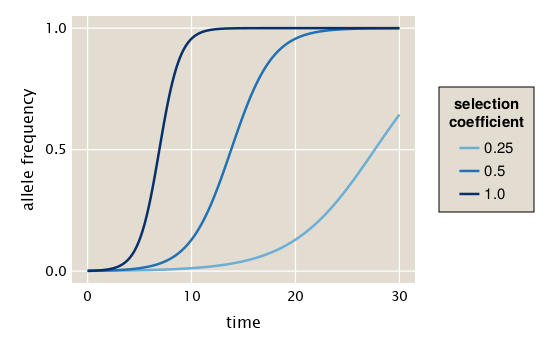

In [27]:
# Define selection coefficients to evaluate
s_coeff = [0.25, 0.5, 1.]

# Define range of time to evaluate
time = LinRange(0, 30, 200)

# Define initial condition
xₒ = 1E-3

# Set figure resolution
figres = 350

# Inititalize figure
fig = Figure(resolution=(figres + 200, figres))

# Add axis
ax = Axis(
    fig[1, 1],
    xlabel="time",
    ylabel="allele frequency",
)

# Define colors
color = get(ColorSchemes.Blues_9, LinRange(0.5, 1, 3))

# Loop through selection coefficients
for (i, s) in enumerate(s_coeff)
    # Evaluate allele frequency
    x = @. xₒ * exp(s * time) / (1 + xₒ * (exp(s * time) - 1))
    # Plot time vs allele frequency
    lines!(ax, time, x, color=color[i], linewidth=2.5, label="$s")
end # for

Legend(fig[1, 2], ax, "selection\ncoefficient")

# Save figure as png
save("$output_dir/_selection_logistic.png", fig)
# Define figure size in inches
size_in_inches = 3
# Define size for pdf
size_pt = 72 * size_in_inches
# Safe figure as pdf
save(
    "$output_dir/_selection_logistic.pdf",
    fig,
    pt_per_unit=size_pt / figres,
)

fig